import and valu initialisation

In [1]:
#%gui tk

import tkinter as tk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from pathlib import Path
import os
import numpy as np
from tkinter import messagebox
from tkinter import filedialog
import subprocess
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import pandas as pd
from tkinter import Tk, Canvas, Entry, Text, Button, PhotoImage
from tkinter import IntVar, Radiobutton
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')



OUTPUT_PATH = Path(os.getcwd())
ASSETS_PATH = OUTPUT_PATH / Path(r"/Users/gruenbergsebastien/Project-ppchem-tools-kit/tkinter/build/assets/frame0")


def relative_to_assets(path: str) -> Path:
    return ASSETS_PATH / Path(path)






Function definition

In [2]:

entry_input = None
entry_x_axis = None
entry_y_axis = None
entry_graph_title = None
selected_radio = None
window = None

def name_to_smiles(molecule_name):
    try:
        compound = pcp.get_compounds(molecule_name, 'name')
        if compound:
            return compound[0].canonical_smiles
        else:
            return None
    except pcp.PubChemHTTPError as e:
        print("Error occurred while fetching data from PubChem:", e)
        return None


def smiles_to_molar_mass(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.ExactMolWt(mol)
    else:
        return None



def make_graph(filepath, x_label, y_label, title, grid=True, save_as=None, line_style='-', line_color='k'):
    global entry_input, entry_x_axis, entry_y_axis, entry_graph_title
    global selected_radio

    try:
       
        df = pd.read_excel(filepath)
        data_list = df.values.tolist()
        x_values = [row[0] for row in data_list]  
        y_values = [row[1] for row in data_list]  

        plt.plot(x_values, y_values, linestyle=line_style, color=line_color)
        plt.xlabel(x_label, fontsize=15)  
        plt.ylabel(y_label, fontsize=15) 
        plt.title(title, fontsize=20)
        plt.rcParams['figure.dpi'] = 300
        plt.rcParams['savefig.dpi'] = 300
        plt.tight_layout()
    
        if grid:
            plt.grid(True)
        else:
            plt.grid(False)

        
        plt.show()

        if save_as:
            plt.savefig(save_as)
        '''graph_window = tk.Toplevel()
        graph_window.geometry("500x500")
        graph_window.title("Graph")
        plot_canvas = FigureCanvasTkAgg(plt.gcf(), master=graph_window)
        plot_canvas.draw()
        plot_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)'''
        
        
    except FileNotFoundError:
        messagebox.showerror("Error", "The data file was not found.")



def linear_regression(file_path, x_label, y_label, title, grid=True, save_as=None, line_style='-', line_color='k'):
    global entry_input, entry_x_axis, entry_y_axis, entry_graph_title
    global selected_radio

    try:

        df = pd.read_excel(file_path)
        data_list = df.values.tolist()
        x_values = np.array([row[0] for row in data_list]).reshape(-1, 1) 
        y_values = [row[1] for row in data_list]

        model = LinearRegression()
        model.fit(x_values, y_values)


        y_pred = model.predict(x_values)

        r2 = r2_score(y_values, y_pred)

        plt.plot(x_values, y_pred, color='red', label='Linear Regression', linestyle=line_style, linewidth=1)
        plt.scatter(x_values, y_values, color='blue', label='Data Points')
        plt.xlabel(x_label, fontsize=15)
        plt.ylabel(y_label, fontsize=15)
        plt.title(title, fontsize=20)
        plt.rcParams['figure.dpi'] = 300
        plt.rcParams['savefig.dpi'] = 300
        plt.tight_layout()

        if grid:
            plt.grid(True)
        else:
            plt.grid(False)

        plt.legend()


        plt.text(0.6, 0.8, f'$R^2 = {r2:.2f}$', ha='center', va='center', transform=plt.gca().transAxes, fontsize=13, fontname='Times New Roman')

        plt.show()

        if save_as:
            plt.savefig(save_as)

    except FileNotFoundError:
        messagebox.showerror("Error", "The data file was not found.")


def process_input(event= None):
    global entry_input, entry_x_axis, entry_y_axis, entry_graph_title, result_text
   # global selected_radio
    #result_text = ""
    input_text = entry_input.get().strip()
    if not input_text:
        messagebox.showerror("Error", "Please enter a molecule name, SMILES code, or file path.")
        return

    if selected_radio.get() == "1":
        smiles_molecule = name_to_smiles(input_text)
        if smiles_molecule is not None:
            result_text = f"The SMILES for the molecule '{input_text}' is: {smiles_molecule}"
        else:
            result_text = f"The molecule '{input_text}' was not found in the PubChem database."
    elif selected_radio.get() == "2":
        molar_mass = smiles_to_molar_mass(input_text)
        if molar_mass is not None:
            result_text = f"The molar mass of the molecule is: {molar_mass} g/mol"
        else:
            result_text = "Invalid SMILES or molecule not found."
    elif selected_radio.get() == "3":
        file_path = entry_input.get().strip()  
        x_label = entry_x_axis.get().strip()  
        y_label = entry_y_axis.get().strip()
        title = entry_graph_title.get().strip()  
        make_graph(file_path, x_label, y_label, title)
    elif selected_radio.get() == "4":  # Linear regression option
        file_path = entry_input.get().strip()  
        x_label = entry_x_axis.get().strip()  
        y_label = entry_y_axis.get().strip()
        title = entry_graph_title.get().strip()  
        linear_regression(file_path, x_label, y_label, title)
        return  # Return to prevent displaying the result window
    else:
        result_text = "Please select an input type."

    display_result(result_text)

    
def display_result(result_text):
    result_window = tk.Toplevel(window)
    result_window.title("Result")


    result_textbox = tk.Text(result_window, wrap="word", font=("Times New Roman", 25), fg="#BBE1FA", bg = "#1B262C", height=10, width=30)
    result_textbox.insert("1.0", result_text)
    result_textbox.config(state="disabled")
    result_textbox.grid(row=0, column=0, padx=0, pady=0)


def browse_excel_file():
    global entry_input
    filepath = filedialog.askopenfilename(title="Select Excel File", filetypes=(("Excel files", "*.xlsx"), ("All files", "*.*")))
    if filepath:
        try:
            entry_input.delete(0, tk.END)  
            entry_input.insert(0, filepath)  
            print("Selected Excel file:", filepath)
            print("File path copied to clipboard.")
        except Exception as e:
            print("Error:", e)
def select_all(event):
    if window and window.winfo_exists():
        event.widget.tag_add("sel", "1.0", "end")
    return "break"

def copy_text(event):
    try:
        if window and window.winfo_exists():
            if event and event.widget and event.widget.winfo_exists():
                event.widget.event_generate("<<Copy>>")
    except Exception as e:
        print("Error while copying text:", e)
    return "break"

def bind_enter(event):
    try:
        if event.keysym == "Return":
            process_input()
    except Exception as e:
        print("Error while binding Enter key:", e)

# Avant de détruire la fenêtre principale, détacher les gestionnaires d'événements














2024-05-11 10:32:17.556 python[1304:22266] +[CATransaction synchronize] called within transaction
2024-05-11 10:32:17.733 python[1304:22266] +[CATransaction synchronize] called within transaction


Selected Excel file: /Users/gruenbergsebastien/Project-ppchem-tools-kit/tkinter/testouille.xlsx
File path copied to clipboard.


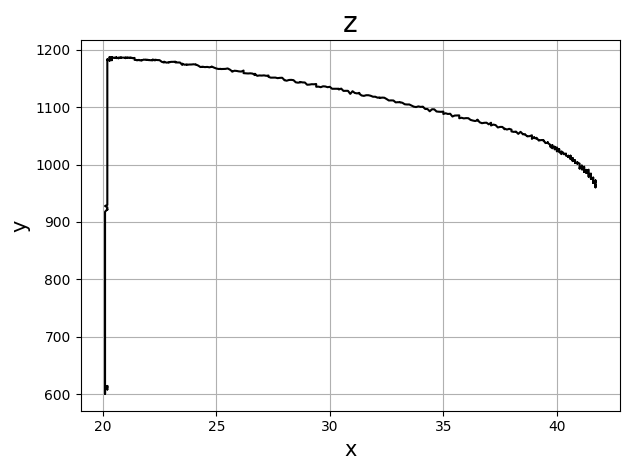

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/gruenbergsebastien/anaconda3/envs/my-rdkit-env/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/var/folders/c0/k58x6jhn4kg9pqh8gp2fc1xw0000gn/T/ipykernel_1304/1072679354.py", line 155, in process_input
    display_result(result_text)
NameError: name 'result_text' is not defined. Did you mean: 'input_text'?


: 

In [3]:

window = tk.Tk()  #creates a Tkinter window instance

#window.geometry(f"{window.winfo_reqwidth()}x{window.winfo_reqheight()}+{window.winfo_screenwidth()//2 - window.winfo_reqwidth()//2}+{window.winfo_screenheight()//2 - window.winfo_reqheight()//2}")
window.title("Project Tools-Kit")
input_type = tk.IntVar() #creates a Tkinter IntVar variable, which is used to track the value of the selected input type. In this case, it's initialized to 1
input_type.set(1)

def welcome_message():
    global entry_input
    welcome_window = tk.Toplevel(window)
    welcome_window.title("Welcome Message")

    welcome_text = (
        "Welcome!\n\n"
        "Here is our project: https://github.com/sgrunber/Project-ppchem-tools-kit\n\n"
        "Enjoy ;)"
    )
    welcome_textbox = tk.Text(welcome_window, wrap="word", font=("Times New Roman", 25), fg="#BBE1FA", bg = "#1B262C", height=7, width=45)
    welcome_textbox.insert("1.0", welcome_text)
    welcome_textbox.config(state="disabled")
    welcome_textbox.grid(row=0, column=0, padx=0, pady=0)


window.geometry("1000x800")
window.configure(bg = "#1B262C")

canvas = Canvas(window, bg="#1B262C", height=800, width=1000, bd=0, highlightthickness=0, relief="ridge")
canvas.place(x=0, y=0)

canvas.create_text(12.0, 194.0, anchor="nw", text="Choose Input Type :", fill="#BBE1FA", font=("Times New Roman", 27, "bold"))


canvas.create_text(92.0, 378.0, anchor="nw",text="Input :", fill="#BBE1FA", font=("Times New Roman", 30, "bold"))
entry_input = Entry(bd=1, bg="#0F4C75", fg="#BBE1FA", highlightthickness=0, font=("Times New Roman", 25))
entry_input.place(x=272.5, y=368.0, width=605.0, height=74.0)

button_image_browse = PhotoImage(file=relative_to_assets("button_browse.png")) 
button_browse = Button(image=button_image_browse, borderwidth=0, highlightthickness=0, command=browse_excel_file, relief="flat")
button_browse.place(x=70.0, y=526.5, width=154.2904052734375, height=60.0)

button_image_process = PhotoImage(file=relative_to_assets("button_process.png"))
button_process = Button(image=button_image_process, borderwidth=0, highlightthickness=0, command=process_input, relief="flat")
button_process.place(x=409.0, y=680.0, width=182.0, height=73.0)

button_image_title = PhotoImage(file=relative_to_assets("button_title.png"))
button_title = Button(image=button_image_title, borderwidth=0, highlightthickness=0, command=welcome_message, relief="flat")
button_title.place(x=273.0, y=36.0, width=455.0, height=90.0)

canvas.create_text(590.0, 500.0, anchor="nw", text="Y Axis Label :", fill="#FFFFFF", font=("Times New Roman", 20 * -1))
entry_y_axis = Entry(bd=1, bg="#0F4C75", fg="#BBE1FA", highlightthickness=0, font=("Times New Roman", 20))
entry_y_axis.place(x=710.0, y=489.0, width=190.0, height=41.0)


canvas.create_text(300.0, 570.0, anchor="nw", text="Title :", fill="#FFFFFF", font=("Times New Roman", 22 * -1))
entry_graph_title = Entry(bd=1, bg="#0F4C75", fg="#BBE1FA", highlightthickness=0, font=("Times New Roman", 20))
entry_graph_title.place(x=380.0, y=560.0, width=190.0, height=41.0)


canvas.create_text(260.0, 500.0, anchor="nw", text="X Axis Label :", fill="#FFFFFF", font=("Times New Roman", 20 * -1))
entry_x_axis = Entry(bd=1, bg="#0F4C75", fg="#BBE1FA", highlightthickness=0, font=("Times New Roman", 20))
entry_x_axis.place(x=380.0, y=489.0, width=190.0, height=41.0)



def clear_input():  #defined to clear the content of the input field 
    entry_input.delete(0, tk.END)
    
def on_radio_select(value): #defined to update the selected_radio variable with the selected value and clear the content of the input field 
    selected_radio.set(value)
    clear_input()

def create_radio_button(x, y, text, value):    #defined to create a radio button with the specified text and value at the given position (x, y)
    radio_button = tk.Radiobutton(canvas, text=text, variable=selected_radio, value=value,
                                  command=lambda: on_radio_select(value),
                                  font=("Times New Roman", 20), bg="#1B262C")
    canvas.create_window(x, y, anchor="nw", window=radio_button)

radio_button_data = [
    (291, 194, "Molecule Name", "1"),
    (599, 194, "Excel Graph", "3"),
    (748, 194, "Linear Regression", "4"), 
    (774, 252, "Random", "random1"),
    (315, 252, "Random", "random2"),
    (469, 252, "Random", "random3"),
    (621, 252, "Random", "random4"),
    (469, 194, "SMILEs", "2")
]  

selected_radio = tk.StringVar(value="none")
for data in radio_button_data:
    create_radio_button(*data)


canvas.bind('<Return>', bind_enter)

'''
def display_graph(plot):
    graph_window = tk.Toplevel()
    graph_window.title("Graph")
    plot_canvas = FigureCanvasTkAgg(plot, master=graph_window)
    plot_canvas.draw()
    plot_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    toolbar = NavigationToolbar2Tk(plot_canvas, graph_window)
    toolbar.update()
    plot_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    graph_window.mainloop()'''
    
window.unbind_all("<Return>")

def on_closing():
    global window
    if messagebox.askokcancel("Quitter", "Êtes-vous sûr de vouloir quitter ?"):
        window.destroy()
window.protocol("WM_DELETE_WINDOW", on_closing)

window.resizable(False, False)


window.mainloop()
'''try:
    window.mainloop()
except KeyboardInterrupt:
    window.destroy()'''
